# Time Series Introduction


Observational or experimental data observed at points in time are called time series. Answering analytical questions about these data is called time series analysis. There are two major approaches to time series analysis: time domain and frequency domain.

1) Time domain analysis views a time series as linear combination of past values of a noise series and a deterministic component (Wold, 1938).

2) Frequency domain analysis views the time series as the linear combination of sine and cosine series at different frequencies (periods) (Cramer, 1942).

This session introduces concepts from both approaches with implementations in python.

In [1]:
%matplotlib inline

# # Printing
import locale


# # Data
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm

# # Time series

from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse



# # Plotting

import matplotlib.pyplot as plt

# sns.set(style="darkgrid", color_codes=True)






/Users/Pan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Time Series Formats

Time is a scientific and cultural concept. Different cultures have chosen different approaches to measuring the passage of time and recording the current time. Some cultural examples:

- Time zones vs. local times
- Day light savings
- Solar vs. lunar calendars

Cultural differences and different scientific uses have produced many different formats for dates and times. Some examples:

 - M-D-Y, 
 - D-M-Y, 
 - D/M/Y, 
 - Hr:Min AM/PM (12 hour), 
 - Hr+Min (24 hour)
 - Can measure time as counts (seconds) from a start point, e.g., unix time measured from Jan 1 1970, minus leap seconds  

To do data science with temporal data requires parsers to read the different formats. 


## Explicit time formating

In [8]:
# Functions to convert datetimes to strings
time = datetime.now()
str(time)

'2017-11-15 10:12:35.448068'

In [9]:
time

datetime.datetime(2017, 11, 15, 10, 12, 35, 448068)

In [10]:
# Get just the date
time.strftime('%Y-%m-%d')

'2017-11-15'

In [11]:
# Going back to datetime
stime = time.strftime('%Y-%m-%d')
datetime.strptime(stime,'%Y-%m-%d')

datetime.datetime(2017, 11, 15, 0, 0)

## Time parser function

In [12]:
# There is a parser

parse(stime)

datetime.datetime(2017, 11, 15, 0, 0)

In [13]:
# the parser will work with lots of text
parse('Nov 24, 2017, 10:30 am')

datetime.datetime(2017, 11, 24, 10, 30)

In [14]:
time.year, time.month, time.day

(2017, 11, 15)

In [15]:
dt = timedelta(5)
datetime.now() + dt

datetime.datetime(2017, 11, 20, 10, 12, 39, 133177)

## Elements of a time series

- Trend
- Seasonality or periodicity
- Cycles
- Randomness

## Example - Airline Passenger Data

Get the airline passenger data from the url below and read it into a data frame. Look at its shape.

https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

In [16]:
path = "/Users/Pan/Google Drive/Data Science/DS6001/"
file = "international-airline-passengers.csv"
airlines = pd.read_csv(path+file,  header = 0, names = ['Date', 'Passengers'])
airlines.shape

(145, 2)

In [17]:
airlines.head()


,Date,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [18]:
# Null values?

airlines.isnull().sum()

Date          0
Passengers    1
dtype: int64

In [19]:
# Get index for null value
airlines[airlines['Passengers'].isnull()].index.tolist()

[144]

In [20]:
# Remove it

airlines.drop(144, inplace = True)

In [21]:
# Making column Date into a datetime index.

airlines['Date'] = pd.to_datetime(airlines['Date'], format = "%Y-%m")

airlines.index = airlines['Date']
airlines.drop('Date', axis = 1, inplace = True)
airlines.head()

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


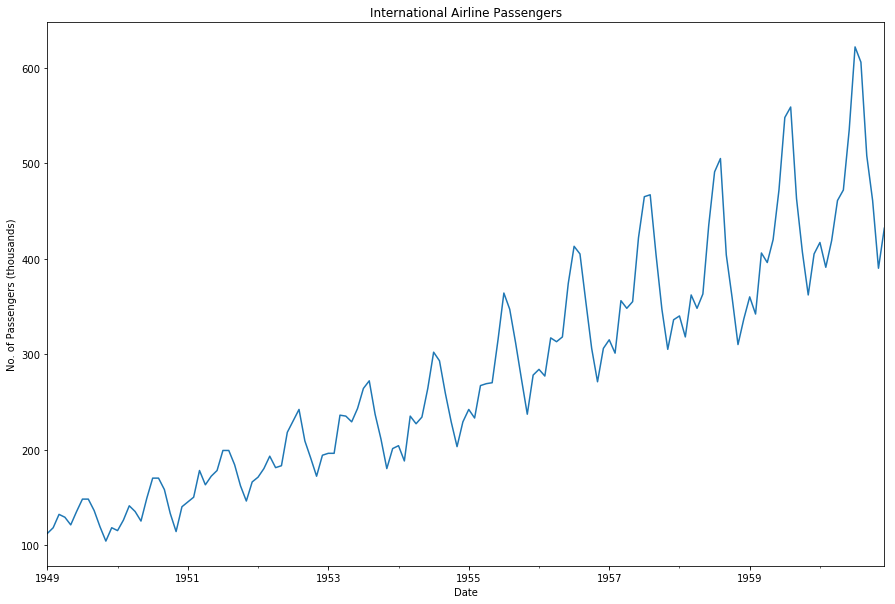

In [22]:
# Plot the passenger data

plt.figure(figsize = (15,10))


airlines.Passengers.plot()
plt.xlabel('Date')
plt.ylabel('No. of Passengers (thousands)')
plt.title("International Airline Passengers")

there is a trend.
there is a bias.
seasonality
variance is changing

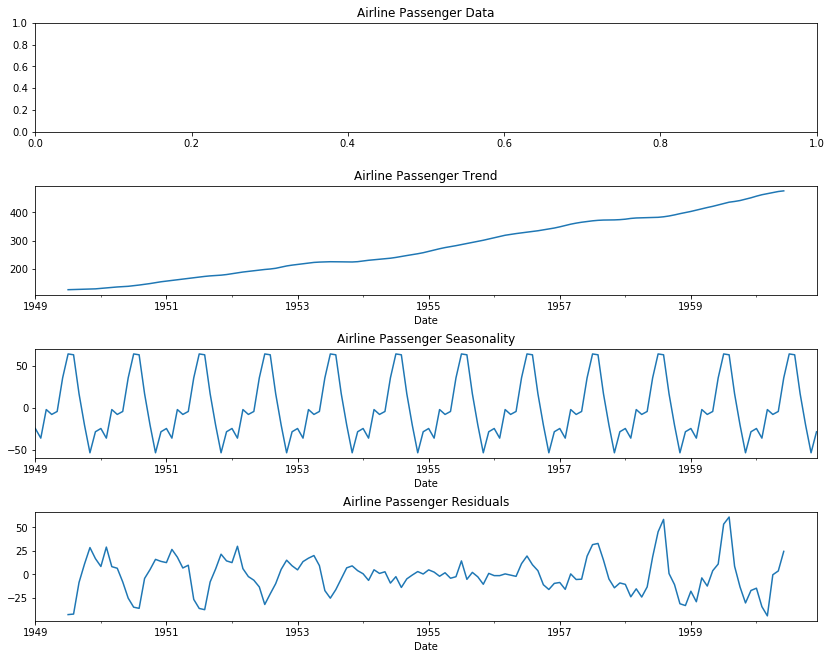

In [106]:
# Decomposing the elements of the time series


from statsmodels.tsa.seasonal import seasonal_decompose

#s=sm.tsa.seasonal_decompose(airlines.Passengers)

decomposition = seasonal_decompose(airlines.Passengers, freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (14,11))
plt.subplots_adjust(hspace = .5)

ts = fig.add_subplot(4, 1, 1)
airlines.Passengers.plot()
ts.set_title("Airline Passenger Data")

ts_trend = fig.add_subplot(4,1,2)
trend.plot()
ts_trend.set_title('Airline Passenger Trend')

ts_seasonal = fig.add_subplot(4,1,3)
seasonal.plot()
ts_seasonal.set_title('Airline Passenger Seasonality')

ts_residual = fig.add_subplot(4,1,4)
residual.plot()
ts_residual.set_title('Airline Passenger Residuals')

cicle: we don't know when it starts and ends

## Time domain filters

Remove some data elements in order to focus on other elements

- Low pass filters remove the high fequency components
- High pass filters remove the low fequency components

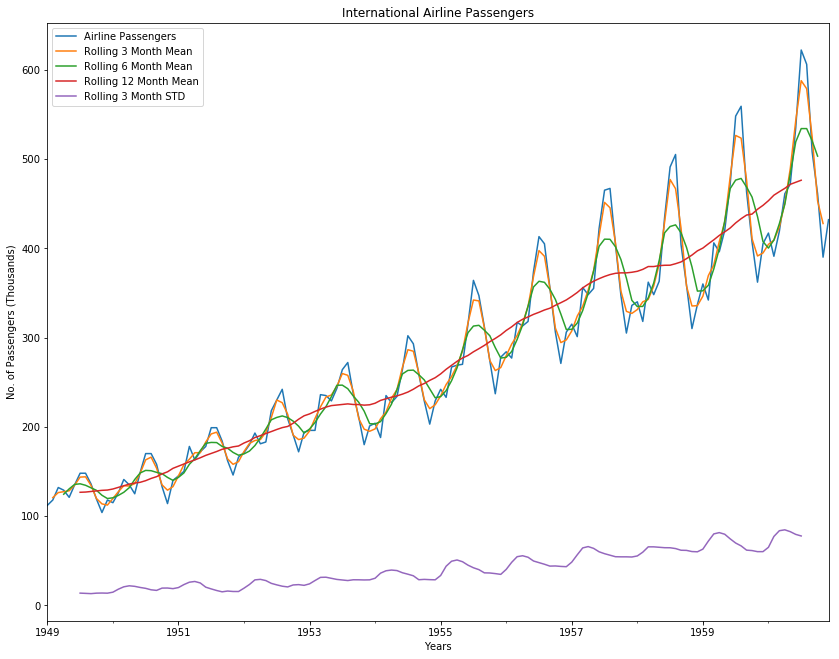

In [131]:
# Low Pass Filters - Moving Averages

# Plot moving (rolling) averages at 3, 6 and 12 months.
# Also plot the standard deviation for 3 months


fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
airlines.Passengers.plot(label = 'Airline Passengers')
airlines.Passengers.rolling(window =  3, center = True).mean().plot(label = 'Rolling 3 Month Mean')
airlines.Passengers.rolling(window =  6, center = True).mean().plot(label = 'Rolling 6 Month Mean')
airlines.Passengers.rolling(window =  12, center = True).mean().plot(label = 'Rolling 12 Month Mean')
airlines.Passengers.rolling(window =  12, center = True).std().plot(label = 'Rolling 3 Month STD')

ts.legend(loc = 'best')
ts.set_title("International Airline Passengers")
ts.set_ylabel("No. of Passengers (Thousands)")
ts.set_xlabel("Years")


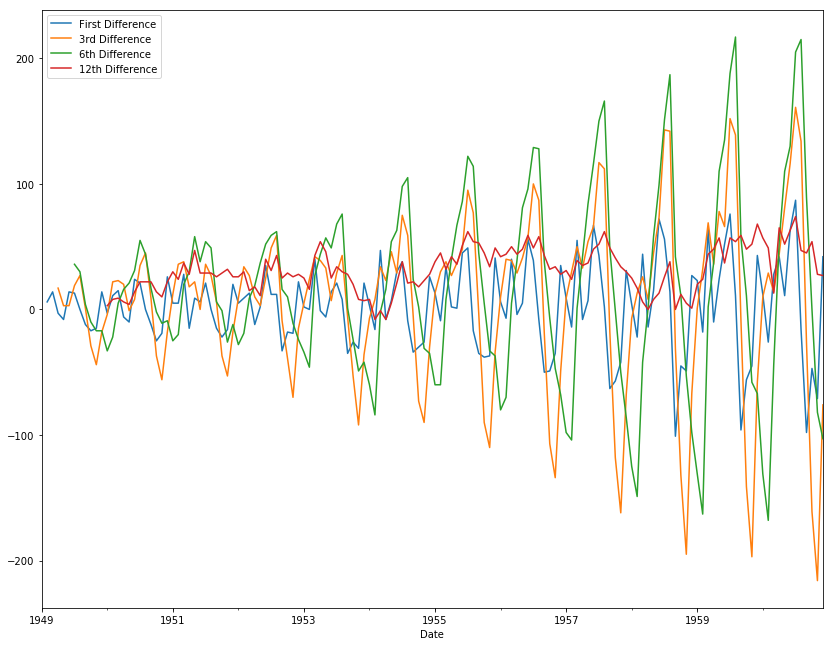

In [25]:
# Filters - Differences
#HighPass Filter

fig = plt.figure(figsize = (14,11))
ts_diff = fig.add_subplot(1,1,1)

airlines['Passengers'].diff(1).plot(label = 'First Difference')
airlines['Passengers'].diff(3).plot(label = '3rd Difference')
airlines['Passengers'].diff(6).plot(label = '6th Difference')
airlines['Passengers'].diff(12).plot(label = '12th Difference')

ts_diff.legend(loc = 'best')



## Stationarity


Given a time series $x_t, t = 1,2, \ldots, N$ we want to know and describe the relationship between $x_t$ and $x_s$ for $t,s \in \{1,2,\ldots,N$. We call $k$ for $x_{t-k}$ a lag of $k$ at time $t$. Similarly, we call $k$ for $x_{t+k}$ a lead of $k$ at time $t$.

The mean of the time series, $\mu$, is constant and the autocovariance, C, is a function only of the lag (or lead). So

$E[(x_t- \mu)(x_{t-k} - \mu)] = C(t,t-k) = C(k)$

In [26]:
# Dickey-Fuller test of stationarity
# 

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    # Null hypothesis is that the data are non-stationary
    print ('Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

In [27]:
# Test airlines data for stationarity

test_stationarity(airlines['Passengers'])
#null hypothesis is not stable

Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Autocorrelation and Partial Autocorrelation

For lag $k$ let $C(k)$ be the autocorrelation between $x_t, x_{t-k}, t = 1,2,\ldots,N$. Then the autocorrelation at $k$  is $\rho(k) = \frac{C(k)}{C(0)}$.

Let $z_t = x_t - E(x)$. The partial autocorrelation at lag $k$ is the last coefficient in the regression:        
z: mean centered          
final lag of interest: k          


\begin{equation*}
z_t = \phi_{t-1}z_{t-1} + \phi_{t-2}z_{t-2} + \cdots \ + \phi_{t-k}z_{t-k} + \epsilon
\end{equation*}

lag 1:          
\begin{equation*}z_t=\phi_{11}Z_{t-1} + \epsilon\end{equation*}
lag2:        
\begin{equation*}z_t=\phi_{12}Z_{t-1} + \phi_{22}Z_{t-2} +\epsilon\end{equation*}
last lag:        
\begin{equation*}z_t = \phi_{t-1}z_{t-1} + \phi_{t-2}z_{t-2} + \cdots \ + \phi_{t-k}z_{t-k} + \epsilon\end{equation*}


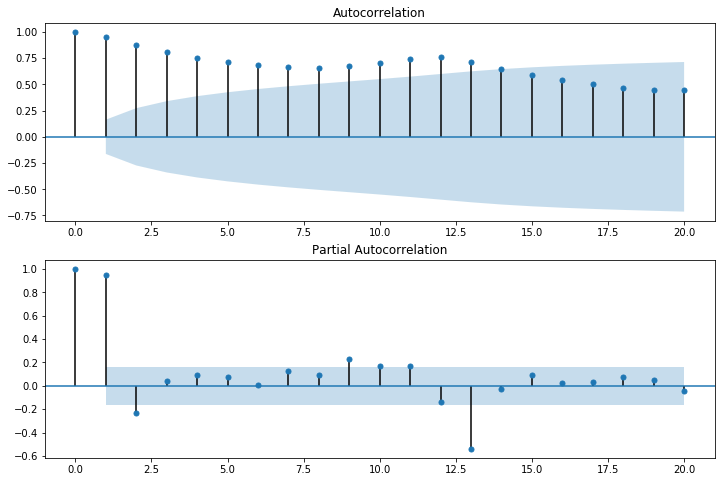

In [28]:

# Autocorrelation and partial autocorrelations for the airline data.

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(airlines['Passengers'], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(airlines['Passengers'], lags=20, ax=ax2)

# Frequency Domain

Model the time series as Fourier frequencies with sine and cosine functions. Generally,

$x_t = \sum_{k=1}^Q [a_{1k}sin(2\pi\nu_kt) + a_{2k}cos(2\pi\nu_kt)]$

where $\nu$ is the frequency and the period is $1/\nu$. For computational reasons we use the
discrete Fourier transform:

$X(\nu_k) = n^{-\frac{1}{2}} \sum_{t=1}^n x_t exp(-2\pi i\nu_k t)  $

Graphs of the FFT give the periordogram which plots power vs. frequency

In [29]:
# Get the FFT for the passenger series

passengers_fft = sp.fftpack.fft(airlines['Passengers'])
passengers_psd = np.abs(passengers_fft)**2

In [30]:
# Filter by positive frequencies

passengers_fftfreq = sp.fftpack.fftfreq(len(passengers_psd), 1/12)
i = passengers_fftfreq > 0 

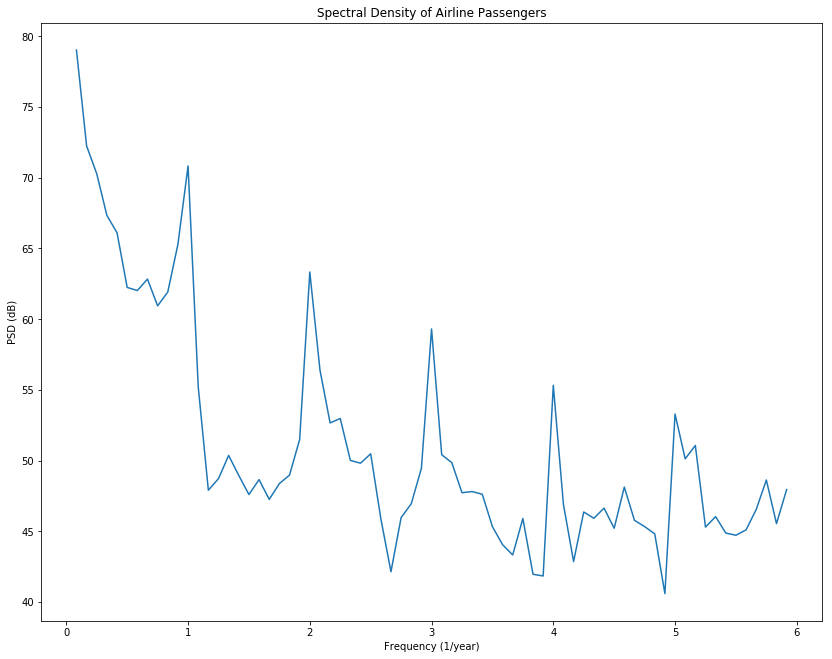

In [31]:
# Plot the Periodogram and find the frequencies

plt.figure(figsize = (14,11))
plt.plot(passengers_fftfreq[i], 10*np.log10(passengers_psd[i]))
#plt.xlim(0,5)
plt.xlabel('Frequency (1/year)')
plt.ylabel('PSD (dB)')
plt.title('Spectral Density of Airline Passengers')

In [32]:
# Remove all frequencies that are harmonics
# Invert the FFT to get a model of the time series
# Use only the real part

passengers_fft_bis = passengers_fft.copy() # get a copy
passengers_fft_bis[np.abs(passengers_fftfreq > 1.1)] = 0 # remove harmonics
passengers_freqfit = np.real(sp.fftpack.ifft(passengers_fft_bis)) #invert fft
passengers_freqfit = pd.Series(passengers_freqfit, index = airlines.index)

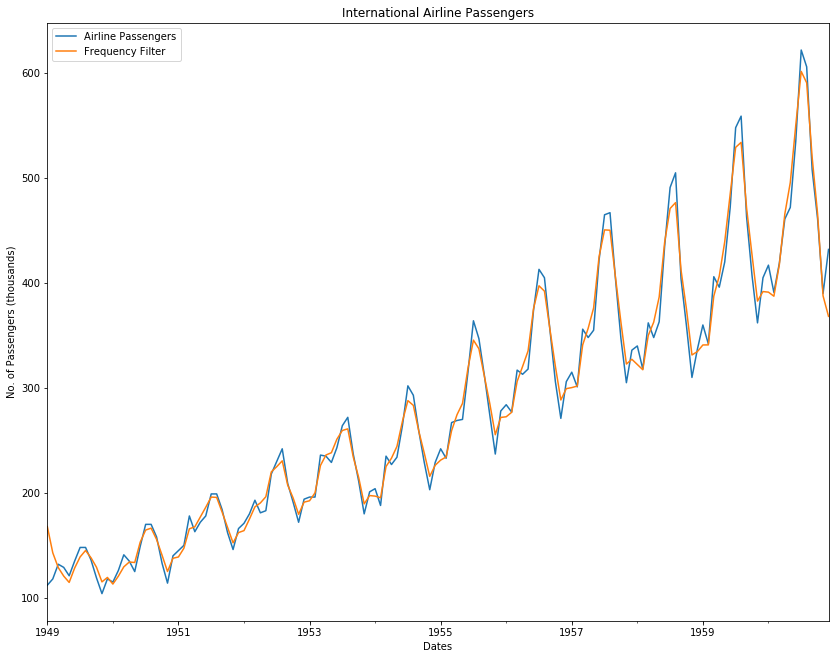

In [33]:
# 
# Then plot on the original series
# with the frequency model

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
airlines['Passengers'].plot(label = 'Airline Passengers')
passengers_freqfit.plot(label = 'Frequency Filter')

ts.legend(loc = 'best')
ts.set_title("International Airline Passengers")
plt.xlabel('Dates')
plt.ylabel('No. of Passengers (thousands)')

boundry limitation

# Exercises

Load each of the data sets (from Schumway, 2014):

    - speech.csv (speech recording)
    - liveBirths.txt (U.S. Monthly Live Births)
    - oil.csv (Crude oil, WTI spot price FOB)
    - globtemp.csv (Global mean land-ocean temperature deviations)
    - flu.csv (Monthly pneumonia and influenza deaths in the U.S., 1968 to 1978)
    
For each of these time series do the following

    1. Decompose to show the elements of the time series
    2. Filter based on moving averages (at least 3) and differences (at least the first)
    3. Plot the autocorrelations and partial autocorrelations
    4. Plot the periodogram and the frequencies with the original series
    5. Based on these filters and visualizations, comment on the characteristics (elements) of the time series


### Load Data ###

In [97]:
path = "/Users/Pan/Google Drive/Data Science/DS6001/timeseriesData/"

speech = pd.read_csv(path+"speech.dat", header = -1,names = ['mycol'])
birth = pd.read_csv(path+"birth.dat",  header = -1, names = ['mycol'])
oil = pd.read_csv(path+"oil.csv",  header = -1, names = ['mycol'])
globtemp = pd.read_csv(path+"globtemp.dat",  header = -1, names = ['mycol'])
flu = pd.read_csv(path+"flu.dat",  header = -1, names = ['mycol'])

In [54]:
oil.head(5)

,mycol
0,26.20
1,26.07
2,26.34
3,24.95
4,26.27


# speech #
A small .1 second (1000 points) sample of recorded speech for the phrase "aaa...hhh".

In [98]:
from datetime import datetime, timedelta

now = datetime(2000, 1, 1, 0, 0, 0)
last = datetime(2000, 1, 1, 1, 5, 0)
delta = timedelta(seconds=.1)

times = []
while len(times)<1020:
    times.append(now)
    now += delta

speech.index = times
speech.index

DatetimeIndex([       '2000-01-01 00:00:00', '2000-01-01 00:00:00.100000',
               '2000-01-01 00:00:00.200000', '2000-01-01 00:00:00.300000',
               '2000-01-01 00:00:00.400000', '2000-01-01 00:00:00.500000',
               '2000-01-01 00:00:00.600000', '2000-01-01 00:00:00.700000',
               '2000-01-01 00:00:00.800000', '2000-01-01 00:00:00.900000',
               ...
                      '2000-01-01 00:01:41', '2000-01-01 00:01:41.100000',
               '2000-01-01 00:01:41.200000', '2000-01-01 00:01:41.300000',
               '2000-01-01 00:01:41.400000', '2000-01-01 00:01:41.500000',
               '2000-01-01 00:01:41.600000', '2000-01-01 00:01:41.700000',
               '2000-01-01 00:01:41.800000', '2000-01-01 00:01:41.900000'],
              dtype='datetime64[ns]', length=1020, freq=None)

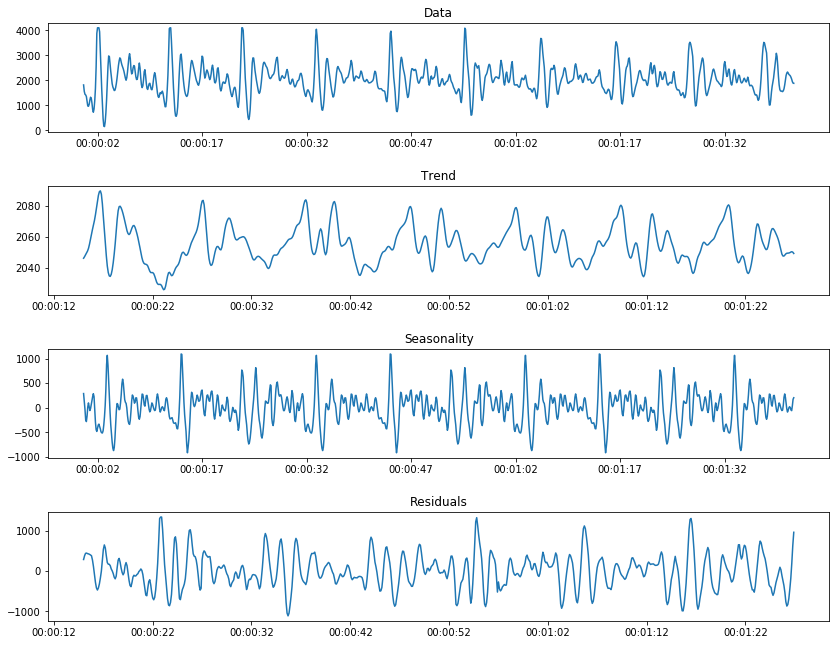

In [102]:
#1. Decompose to show the elements of the time series

decomposition = seasonal_decompose(speech, freq=300)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (14,11))
plt.subplots_adjust(hspace = .5)

ts = fig.add_subplot(4, 1, 1)
ts.set_title("Data")
ts.plot(speech)

ts_trend = fig.add_subplot(4,1,2)
ts_trend.plot(trend)
ts_trend.set_title('Trend')

ts_seasonal = fig.add_subplot(4,1,3)
ts_seasonal.plot(seasonal)
ts_seasonal.set_title('Seasonality')

ts_residual = fig.add_subplot(4,1,4)
ts_residual.plot(residual)
ts_residual.set_title('Residuals')

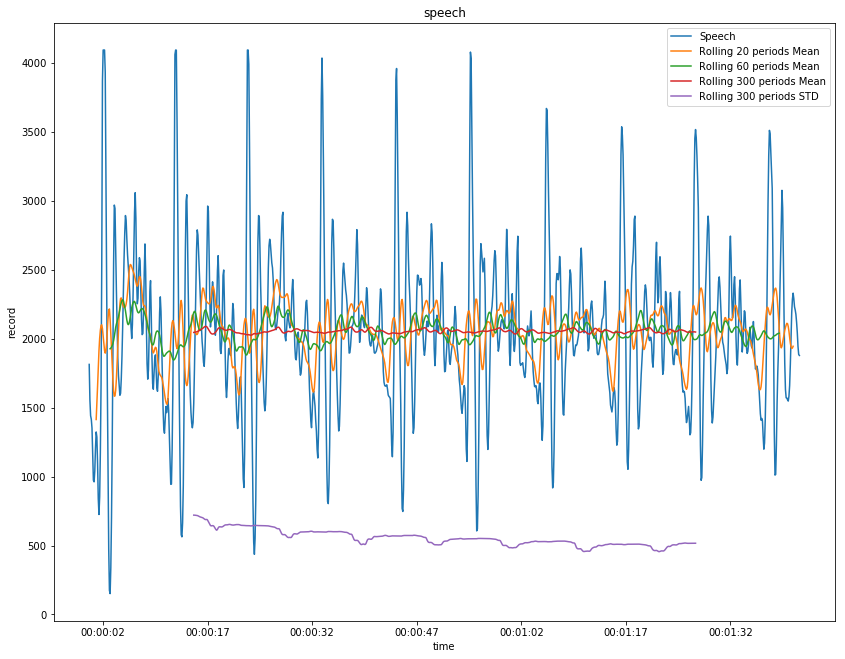

In [143]:
#2. Filter based on moving averages (at least 3) and differences (at least the first)

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(speech,label = 'Speech')

ts.plot(speech.rolling(window =  20, center = True).mean(),label = 'Rolling 20 periods Mean')
ts.plot(speech.rolling(window =  60, center = True).mean(),label = 'Rolling 60 periods Mean')
ts.plot(speech.rolling(window =  300, center = True).mean(),label = 'Rolling 300 periods Mean')
ts.plot(speech.rolling(window =  300, center = True).std(),label = 'Rolling 300 periods STD')

ts.legend(loc = 'best')
ts.set_title("speech")
ts.set_ylabel("record")
ts.set_xlabel("time")


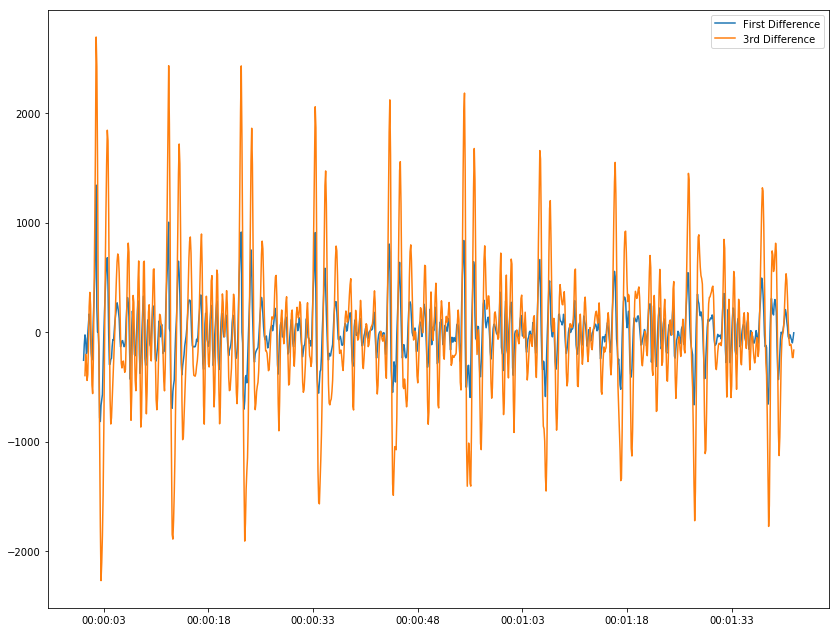

In [147]:
# Filters - Differences
#HighPass Filter

fig = plt.figure(figsize = (14,11))
ts_diff = fig.add_subplot(1,1,1)

ts_diff.plot(speech.diff(1),label = 'First Difference')
ts_diff.plot(speech.diff(3),label = '3rd Difference')
#ts_diff.plot(speech.diff(6),label = '6th Difference')
#ts_diff.plot(speech.diff(12),label = '12th Difference')

ts_diff.legend(loc = 'best')

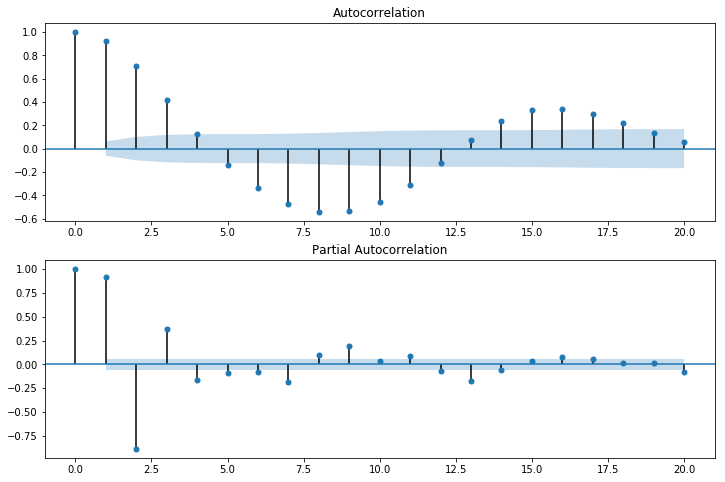

In [156]:
#3. Plot the autocorrelations and partial autocorrelations

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(speech, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(speech, lags=20, ax=ax2)

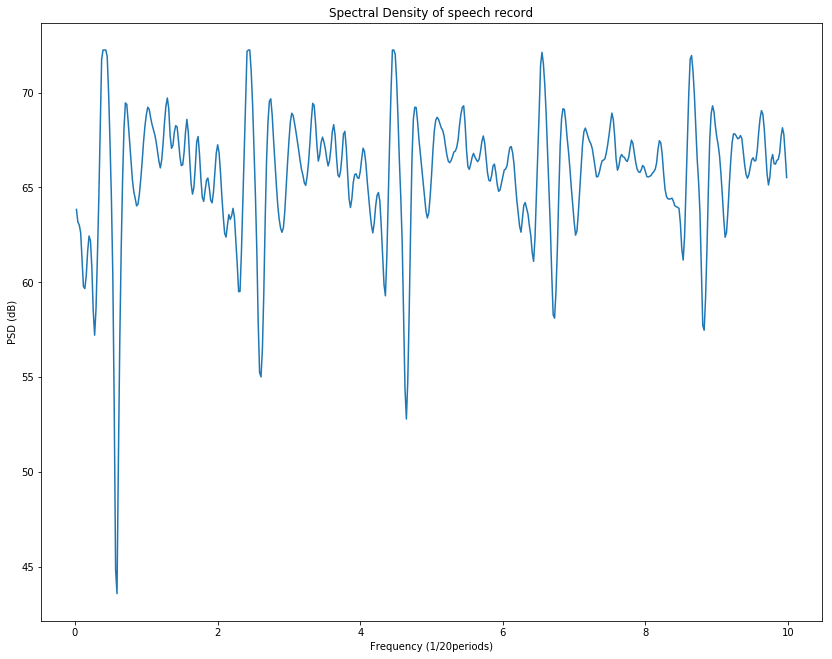

In [159]:
#4. Plot the periodogram and the frequencies with the original series
# Get the FFT for the passenger series

my_fft = sp.fftpack.fft(speech)
my_psd = np.abs(my_fft)**2

# Filter by positive frequencies

my_fftfreq = sp.fftpack.fftfreq(len(my_psd), 1/20)
i = my_fftfreq > 0 

# Plot the Periodogram and find the frequencies

plt.figure(figsize = (14,11))
plt.plot(my_fftfreq[i], 10*np.log10(my_psd[i]))
#plt.xlim(0,5)
plt.xlabel('Frequency (1/20periods)')
plt.ylabel('PSD (dB)')
plt.title('Spectral Density of speech record')

In [165]:
np.asarray(speech.index)

array(['2000-01-01T00:00:00.000000000', '2000-01-01T00:00:00.100000000',
       '2000-01-01T00:00:00.200000000', ...,
       '2000-01-01T00:01:41.700000000', '2000-01-01T00:01:41.800000000',
       '2000-01-01T00:01:41.900000000'], dtype='datetime64[ns]')

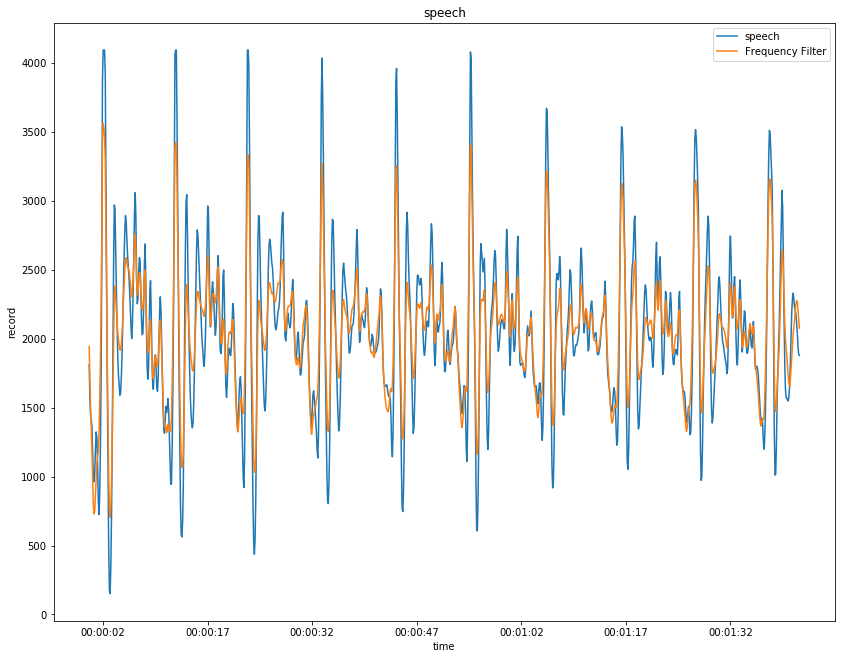

In [168]:
# Remove all frequencies that are harmonics
# Invert the FFT to get a model of the time series
# Use only the real part

my_fft_bis = sp.fftpack.fft(speech['mycol']) # get a copy
my_fft_bis[np.abs(my_fftfreq > 1.1)] = 0 # remove harmonics
my_freqfit = np.real(sp.fftpack.ifft(my_fft_bis)) #invert fft
my_freqfit = pd.Series(my_freqfit,index = np.asarray(speech.index))

# 
# Then plot on the original series
# with the frequency model

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(speech,label = 'speech')
ts.plot(my_freqfit,label = 'Frequency Filter')

ts.legend(loc = 'best')
ts.set_title("speech")
plt.xlabel('time')
plt.ylabel('record')

In [ ]:
#5. Based on these filters and visualizations, comment on the characteristics (elements) of the time series

#filter with 20 periods (2 seconds) seem to have a good prediction

# birth #
Monthly live births (adjusted) in thousands for the United States, 1948-1979.

In [49]:
import datetime
import calendar

def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = int(sourcedate.year + month / 12 )
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year,month)[1])
    return datetime.date(year,month,day)

In [25]:
now = datetime.date(1948, 1, 1)
times = []
while len(times)<len(birth):
    times.append(now)
    now=add_months(now,1)
times

[datetime.date(1948, 1, 1),
 datetime.date(1948, 2, 1),
 datetime.date(1948, 3, 1),
 datetime.date(1948, 4, 1),
 datetime.date(1948, 5, 1),
 datetime.date(1948, 6, 1),
 datetime.date(1948, 7, 1),
 datetime.date(1948, 8, 1),
 datetime.date(1948, 9, 1),
 datetime.date(1948, 10, 1),
 datetime.date(1948, 11, 1),
 datetime.date(1948, 12, 1),
 datetime.date(1949, 1, 1),
 datetime.date(1949, 2, 1),
 datetime.date(1949, 3, 1),
 datetime.date(1949, 4, 1),
 datetime.date(1949, 5, 1),
 datetime.date(1949, 6, 1),
 datetime.date(1949, 7, 1),
 datetime.date(1949, 8, 1),
 datetime.date(1949, 9, 1),
 datetime.date(1949, 10, 1),
 datetime.date(1949, 11, 1),
 datetime.date(1949, 12, 1),
 datetime.date(1950, 1, 1),
 datetime.date(1950, 2, 1),
 datetime.date(1950, 3, 1),
 datetime.date(1950, 4, 1),
 datetime.date(1950, 5, 1),
 datetime.date(1950, 6, 1),
 datetime.date(1950, 7, 1),
 datetime.date(1950, 8, 1),
 datetime.date(1950, 9, 1),
 datetime.date(1950, 10, 1),
 datetime.date(1950, 11, 1),
 datetime.da

In [32]:
birth.index=pd.to_datetime(times)
birth.index

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '1978-04-01', '1978-05-01', '1978-06-01', '1978-07-01',
               '1978-08-01', '1978-09-01', '1978-10-01', '1978-11-01',
               '1978-12-01', '1979-01-01'],
              dtype='datetime64[ns]', length=373, freq=None)

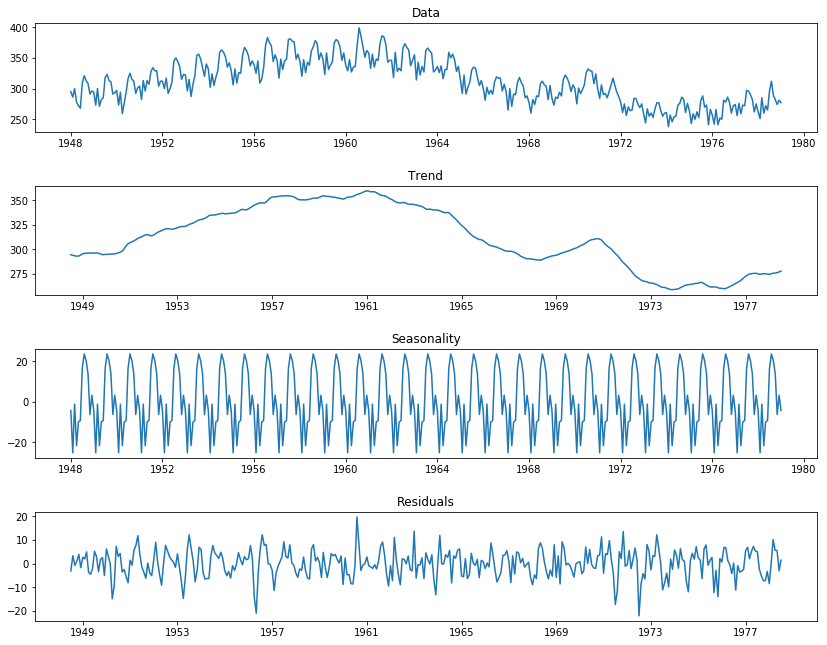

In [33]:
#1. Decompose to show the elements of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(birth, freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (14,11))
plt.subplots_adjust(hspace = .5)

ts = fig.add_subplot(4, 1, 1)
ts.set_title("Data")
ts.plot(birth)

ts_trend = fig.add_subplot(4,1,2)
ts_trend.plot(trend)
ts_trend.set_title('Trend')

ts_seasonal = fig.add_subplot(4,1,3)
ts_seasonal.plot(seasonal)
ts_seasonal.set_title('Seasonality')

ts_residual = fig.add_subplot(4,1,4)
ts_residual.plot(residual)
ts_residual.set_title('Residuals')

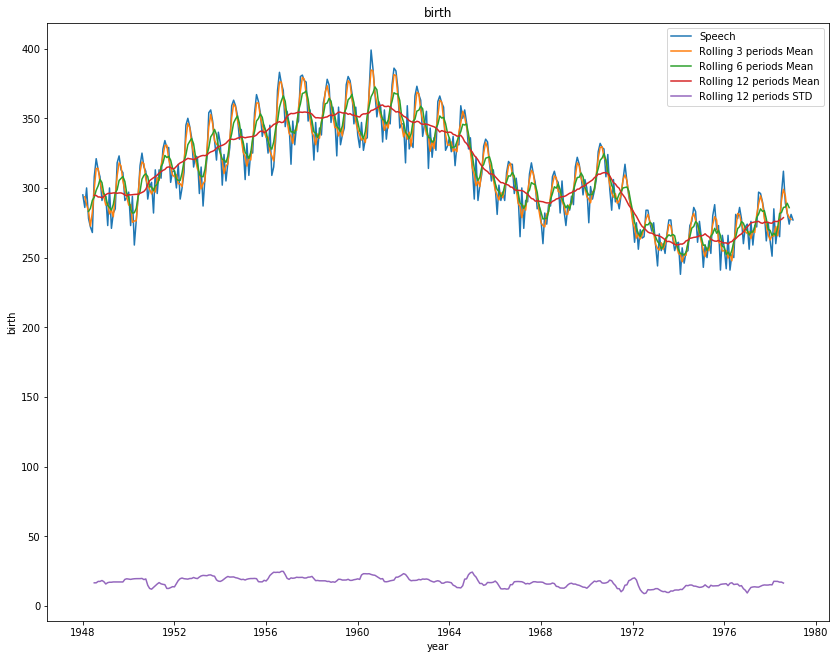

In [35]:
#2. Filter based on moving averages (at least 3) and differences (at least the first)

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(birth,label = 'Speech')

ts.plot(birth.rolling(window =  3, center = True).mean(),label = 'Rolling 3 periods Mean')
ts.plot(birth.rolling(window =  6, center = True).mean(),label = 'Rolling 6 periods Mean')
ts.plot(birth.rolling(window =  12, center = True).mean(),label = 'Rolling 12 periods Mean')
ts.plot(birth.rolling(window =  12, center = True).std(),label = 'Rolling 12 periods STD')

ts.legend(loc = 'best')
ts.set_title("birth")
ts.set_ylabel("birth")
ts.set_xlabel("year")


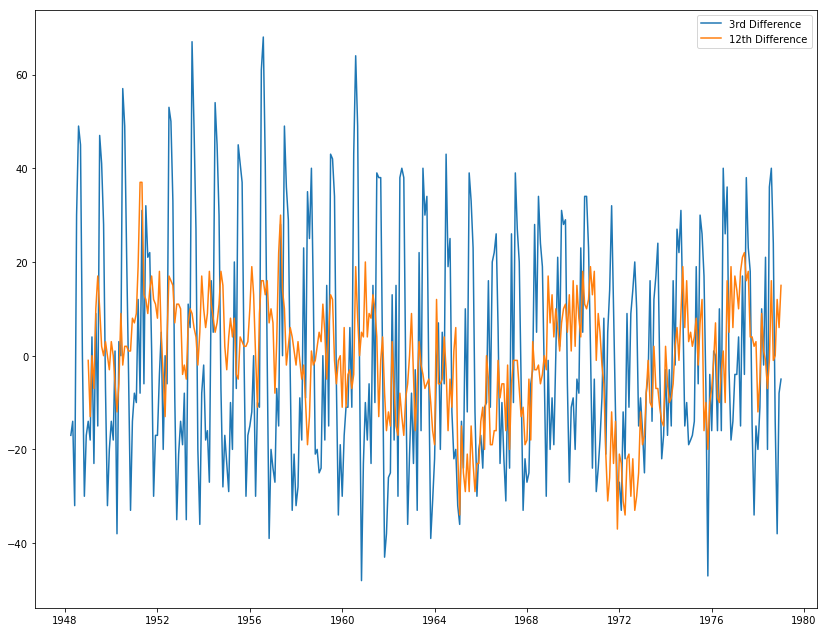

In [38]:
# Filters - Differences
#HighPass Filter

fig = plt.figure(figsize = (14,11))
ts_diff = fig.add_subplot(1,1,1)

#ts_diff.plot(birth.diff(1),label = 'First Difference')
ts_diff.plot(birth.diff(3),label = '3rd Difference')
#ts_diff.plot(birth.diff(6),label = '6th Difference')
ts_diff.plot(birth.diff(12),label = '12th Difference')

ts_diff.legend(loc = 'best')

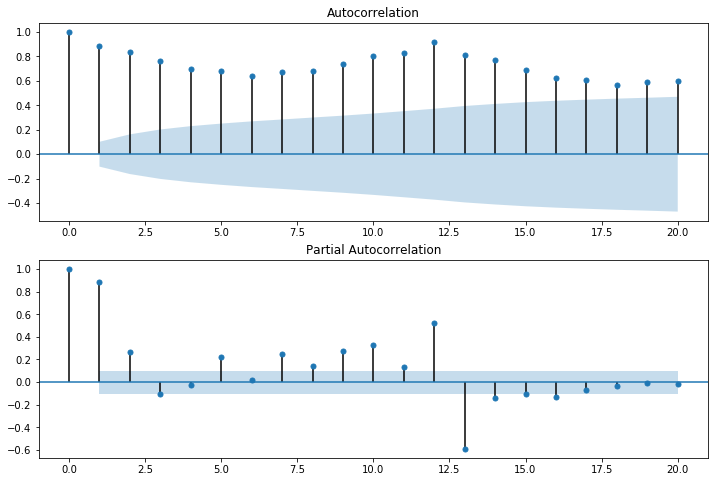

In [39]:
#3. Plot the autocorrelations and partial autocorrelations

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth, lags=20, ax=ax2)

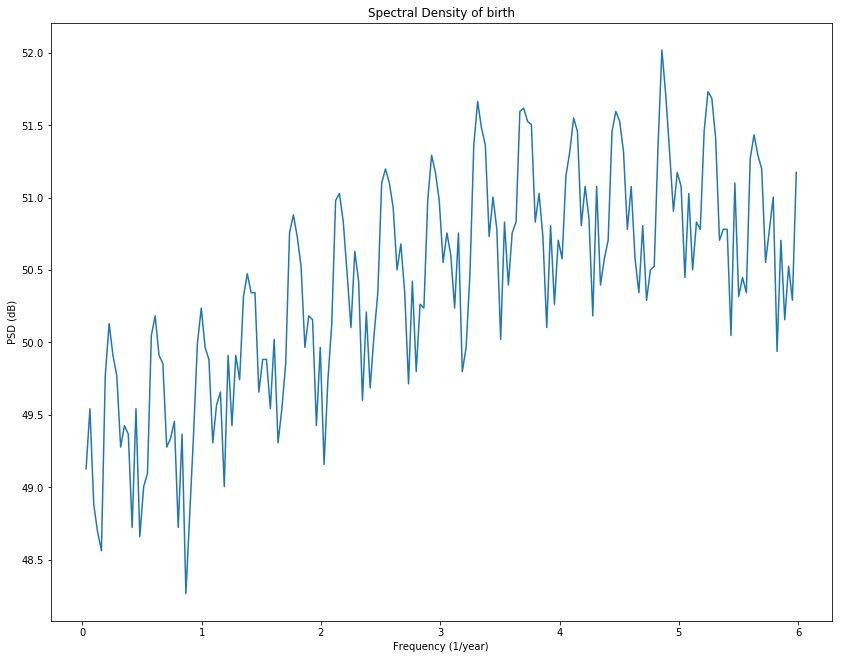

In [41]:
#4. Plot the periodogram and the frequencies with the original series
# Get the FFT for the passenger series

my_fft = sp.fftpack.fft(birth)
my_psd = np.abs(my_fft)**2

# Filter by positive frequencies

my_fftfreq = sp.fftpack.fftfreq(len(my_psd), 1/12)
i = my_fftfreq > 0 

# Plot the Periodogram and find the frequencies

plt.figure(figsize = (14,11))
plt.plot(my_fftfreq[i], 10*np.log10(my_psd[i]))
#plt.xlim(0,5)
plt.xlabel('Frequency (1/year)')
plt.ylabel('PSD (dB)')
plt.title('Spectral Density of birth')

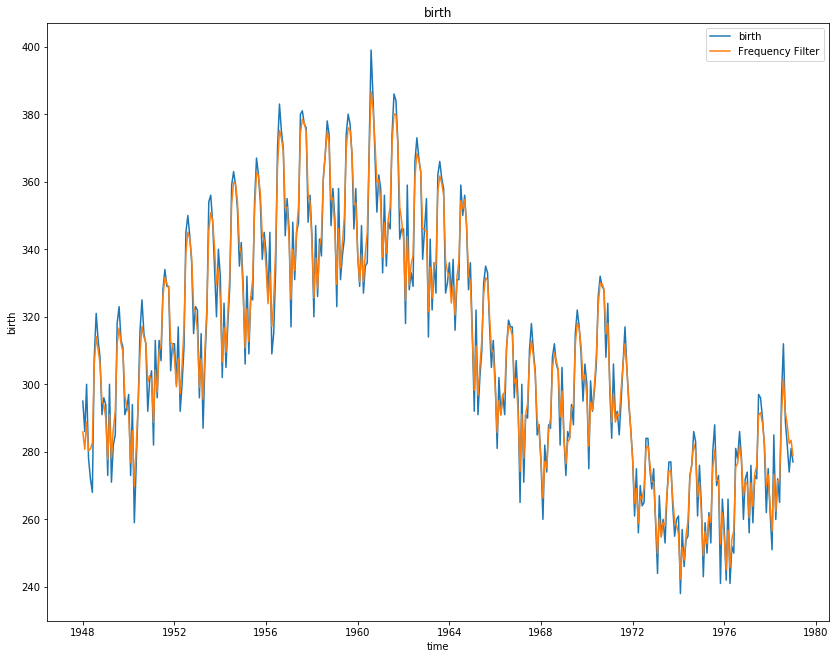

In [43]:
# Remove all frequencies that are harmonics
# Invert the FFT to get a model of the time series
# Use only the real part

my_fft_bis = sp.fftpack.fft(birth['mycol']) # get a copy
my_fft_bis[np.abs(my_fftfreq > 1.1)] = 0 # remove harmonics
my_freqfit = np.real(sp.fftpack.ifft(my_fft_bis)) #invert fft
my_freqfit = pd.Series(my_freqfit,index = np.asarray(birth.index))

# 
# Then plot on the original series
# with the frequency model

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(birth,label = 'birth')
ts.plot(my_freqfit,label = 'Frequency Filter')

ts.legend(loc = 'best')
ts.set_title("birth")
plt.xlabel('time')
plt.ylabel('birth')

In [ ]:
#5. Based on these filters and visualizations, comment on the characteristics (elements) of the time series

#filter with 12 periods (1 year) seem to have a good prediction

# oil #
Crude oil, WTI spot price FOB (in dollars per barrel), from 2000 to mid-2010.

In [57]:
from datetime import datetime, timedelta

now = datetime(2000, 1, 1, 0, 0, 0)
last = datetime(2010, 1, 1, 1, 5, 0)
delta = timedelta(days=7)

times = []
while len(times)<len(oil):
    times.append(now)
    now += delta


oil.index=times

In [60]:
int(365/7)

52

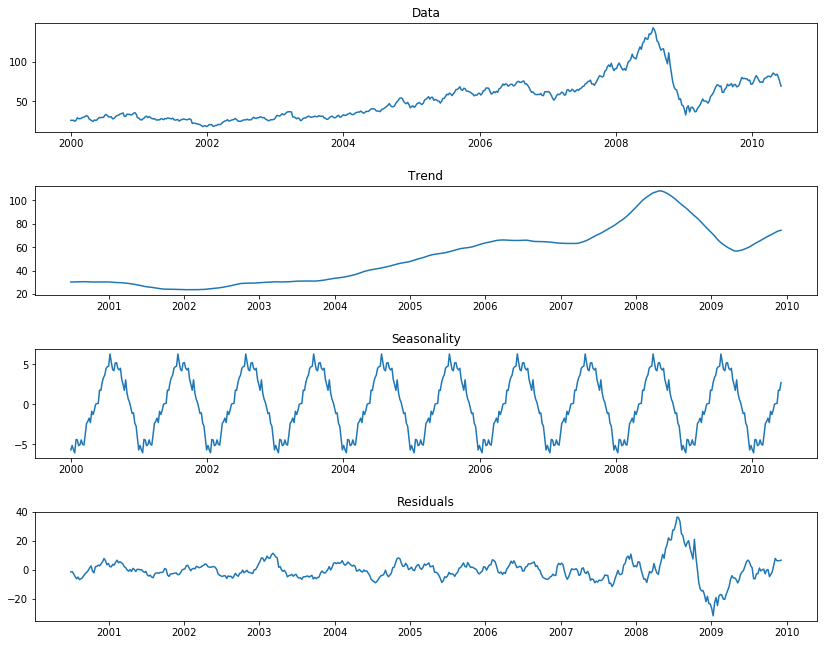

In [59]:
#1. Decompose to show the elements of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(oil, freq=int(365/7))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (14,11))
plt.subplots_adjust(hspace = .5)

ts = fig.add_subplot(4, 1, 1)
ts.set_title("Data")
ts.plot(oil)

ts_trend = fig.add_subplot(4,1,2)
ts_trend.plot(trend)
ts_trend.set_title('Trend')

ts_seasonal = fig.add_subplot(4,1,3)
ts_seasonal.plot(seasonal)
ts_seasonal.set_title('Seasonality')

ts_residual = fig.add_subplot(4,1,4)
ts_residual.plot(residual)
ts_residual.set_title('Residuals')

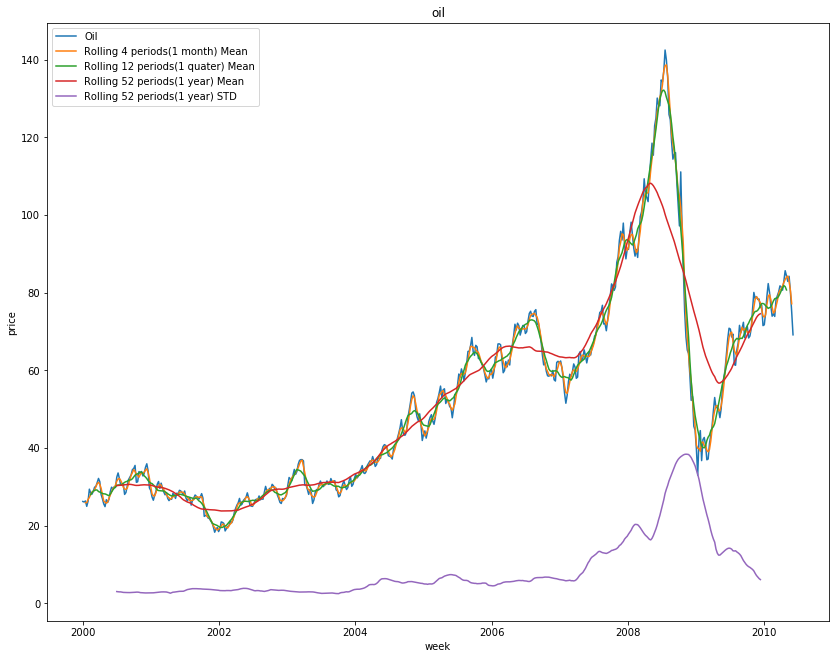

In [61]:
#2. Filter based on moving averages (at least 3) and differences (at least the first)

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(oil,label = 'Oil')

ts.plot(oil.rolling(window =  4, center = True).mean(),label = 'Rolling 4 periods(1 month) Mean')
ts.plot(oil.rolling(window =  12, center = True).mean(),label = 'Rolling 12 periods(1 quater) Mean')
ts.plot(oil.rolling(window =  52, center = True).mean(),label = 'Rolling 52 periods(1 year) Mean')
ts.plot(oil.rolling(window =  52, center = True).std(),label = 'Rolling 52 periods(1 year) STD')

ts.legend(loc = 'best')
ts.set_title("oil")
ts.set_ylabel("price")
ts.set_xlabel("week")


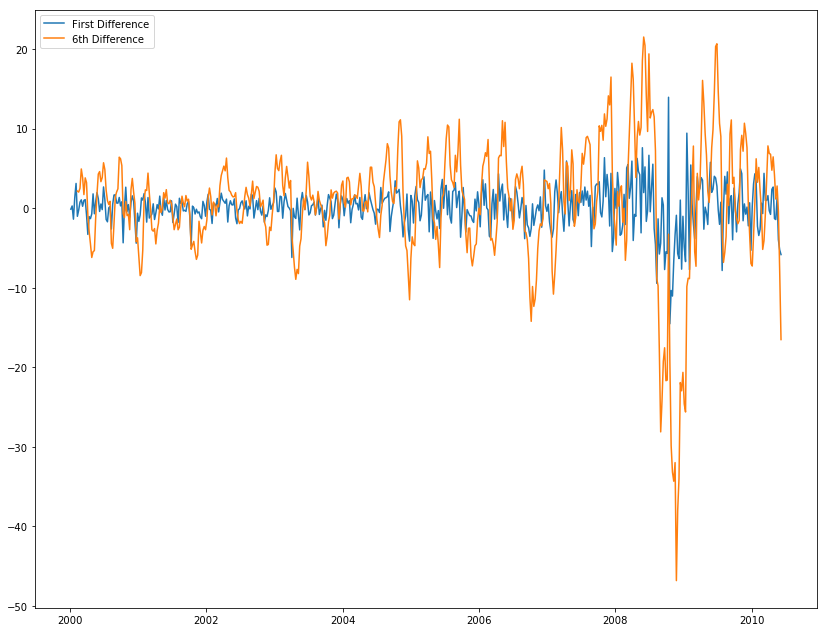

In [64]:
# Filters - Differences
#HighPass Filter

fig = plt.figure(figsize = (14,11))
ts_diff = fig.add_subplot(1,1,1)

ts_diff.plot(oil.diff(1),label = 'First Difference')
#ts_diff.plot(oil.diff(3),label = '3rd Difference')
ts_diff.plot(oil.diff(6),label = '6th Difference')
#ts_diff.plot(oil.diff(12),label = '12th Difference')

ts_diff.legend(loc = 'best')

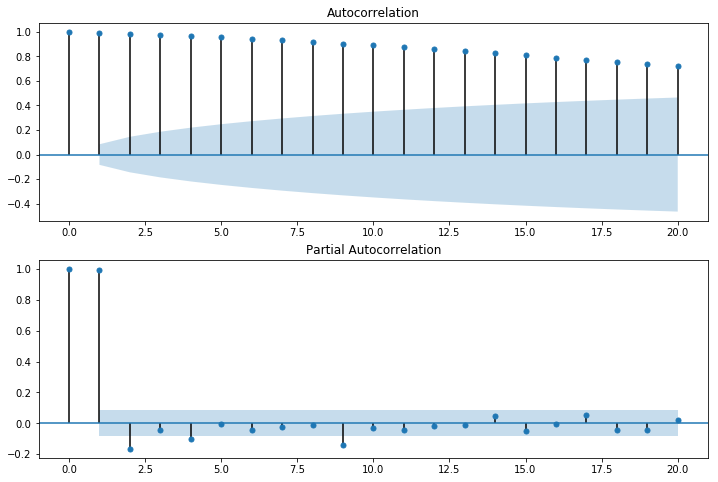

In [65]:
#3. Plot the autocorrelations and partial autocorrelations

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(oil, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(oil, lags=20, ax=ax2)

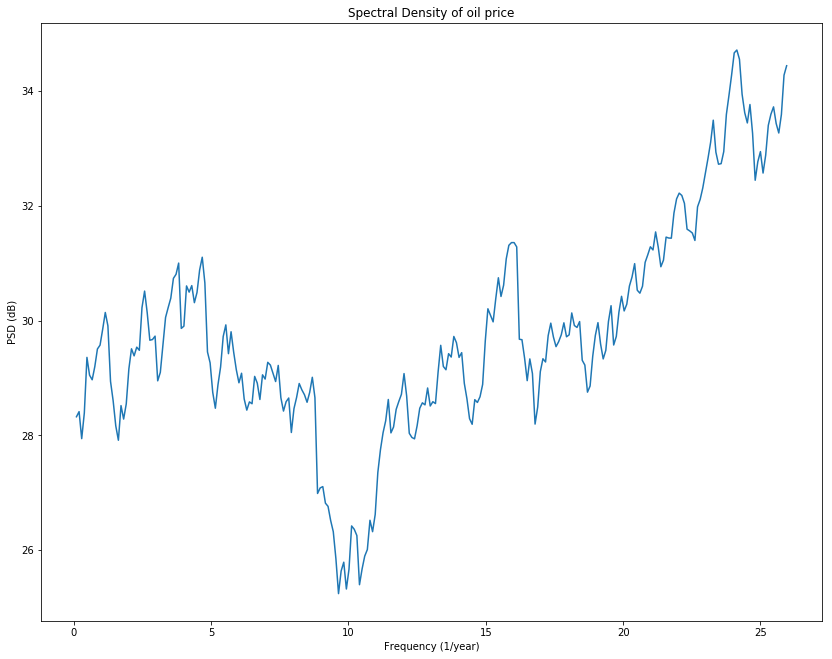

In [69]:
#4. Plot the periodogram and the frequencies with the original series
# Get the FFT for the passenger series

my_fft = sp.fftpack.fft(oil)
my_psd = np.abs(my_fft)**2

# Filter by positive frequencies

my_fftfreq = sp.fftpack.fftfreq(len(my_psd), 1/52)
i = my_fftfreq > 0 

# Plot the Periodogram and find the frequencies

plt.figure(figsize = (14,11))
plt.plot(my_fftfreq[i], 10*np.log10(my_psd[i]))
#plt.xlim(0,5)
plt.xlabel('Frequency (1/year)')
plt.ylabel('PSD (dB)')
plt.title('Spectral Density of oil price')

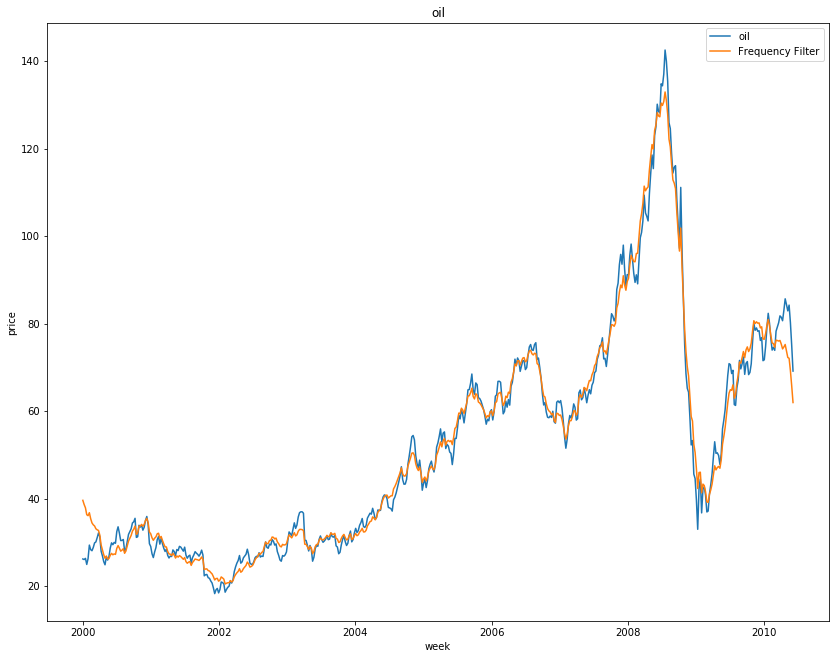

In [73]:
# Remove all frequencies that are harmonics
# Invert the FFT to get a model of the time series
# Use only the real part

my_fft_bis = sp.fftpack.fft(oil['mycol']) # get a copy
my_fft_bis[np.abs(my_fftfreq > 1.1)] = 0 # remove harmonics
my_freqfit = np.real(sp.fftpack.ifft(my_fft_bis)) #invert fft
my_freqfit = pd.Series(my_freqfit,index = np.asarray(oil.index))

# 
# Then plot on the original series
# with the frequency model

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(oil,label = 'oil')
ts.plot(my_freqfit,label = 'Frequency Filter')

ts.legend(loc = 'best')
ts.set_title("oil")
plt.xlabel('week')
plt.ylabel('price')

In [ ]:
#5. Based on these filters and visualizations, comment on the characteristics (elements) of the time series

#filter with 52 periods (1 year) seem to have a good prediction

# globtemp #
Global mean land-ocean temperature deviations. This file contains 142 observations for the years 1856-1997

In [90]:
times=pd.date_range(start=pd.datetime(1856, 1, 1), periods=142, freq='A-JAN')
globtemp.index=times
times

DatetimeIndex(['1856-01-31', '1857-01-31', '1858-01-31', '1859-01-31',
               '1860-01-31', '1861-01-31', '1862-01-31', '1863-01-31',
               '1864-01-31', '1865-01-31',
               ...
               '1988-01-31', '1989-01-31', '1990-01-31', '1991-01-31',
               '1992-01-31', '1993-01-31', '1994-01-31', '1995-01-31',
               '1996-01-31', '1997-01-31'],
              dtype='datetime64[ns]', length=142, freq='A-JAN')

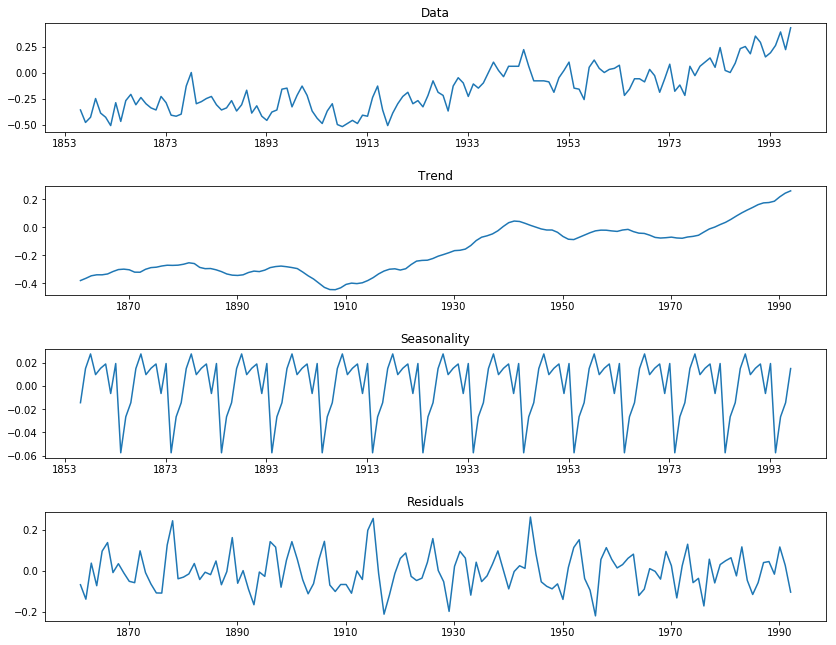

In [92]:
#1. Decompose to show the elements of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(globtemp, freq=10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (14,11))
plt.subplots_adjust(hspace = .5)

ts = fig.add_subplot(4, 1, 1)
ts.set_title("Data")
ts.plot(globtemp)

ts_trend = fig.add_subplot(4,1,2)
ts_trend.plot(trend)
ts_trend.set_title('Trend')

ts_seasonal = fig.add_subplot(4,1,3)
ts_seasonal.plot(seasonal)
ts_seasonal.set_title('Seasonality')

ts_residual = fig.add_subplot(4,1,4)
ts_residual.plot(residual)
ts_residual.set_title('Residuals')

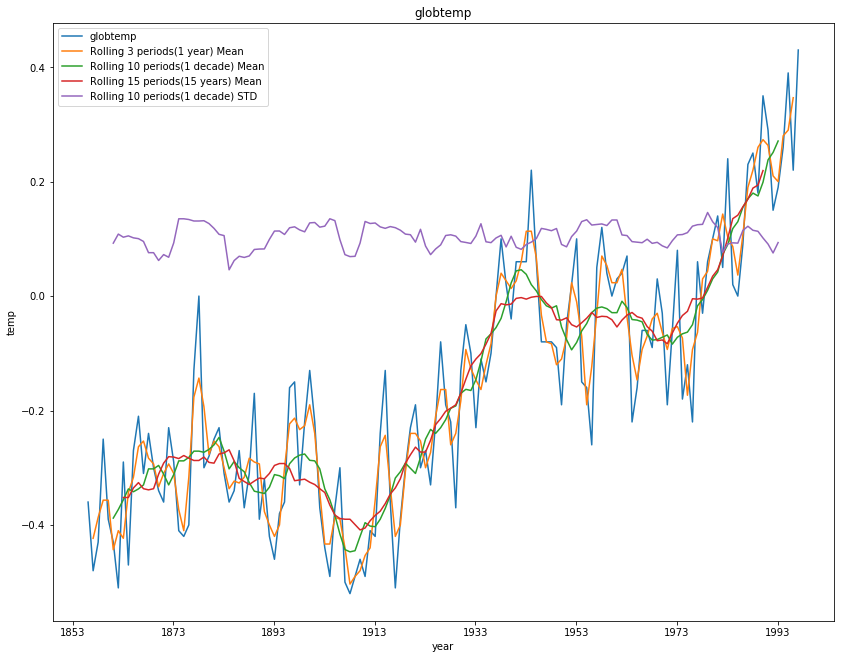

In [94]:
#2. Filter based on moving averages (at least 3) and differences (at least the first)

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(globtemp,label = 'globtemp')

ts.plot(globtemp.rolling(window =  3, center = True).mean(),label = 'Rolling 3 periods(1 year) Mean')
ts.plot(globtemp.rolling(window =  10, center = True).mean(),label = 'Rolling 10 periods(1 decade) Mean')
ts.plot(globtemp.rolling(window =  15, center = True).mean(),label = 'Rolling 15 periods(15 years) Mean')
ts.plot(globtemp.rolling(window =  10, center = True).std(),label = 'Rolling 10 periods(1 decade) STD')

ts.legend(loc = 'best')
ts.set_title("globtemp")
ts.set_ylabel("temp")
ts.set_xlabel("year")


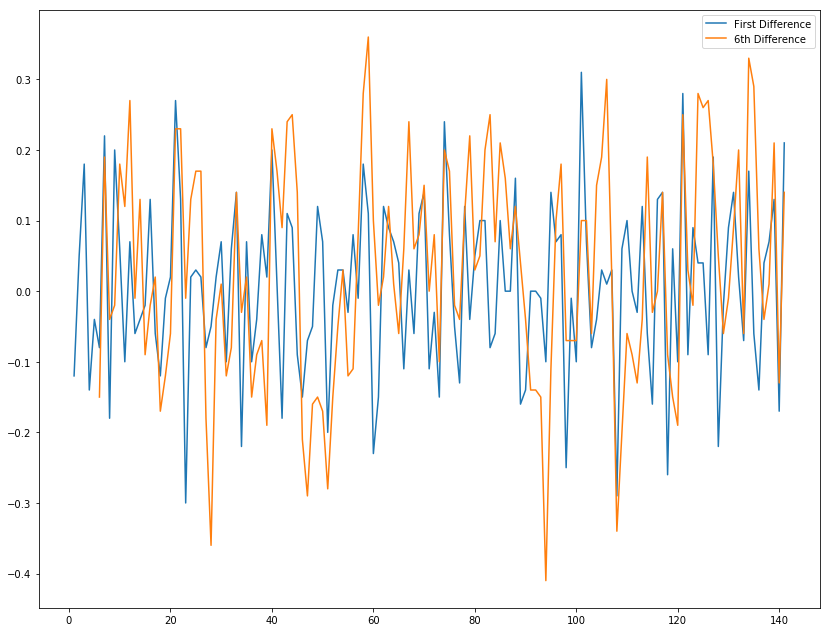

In [103]:
# Filters - Differences
#HighPass Filter

fig = plt.figure(figsize = (14,11))
ts_diff = fig.add_subplot(1,1,1)

ts_diff.plot(globtemp.diff(1),label = 'First Difference')
#ts_diff.plot(oil.diff(3),label = '3rd Difference')
ts_diff.plot(globtemp.diff(6),label = '6th Difference')
#ts_diff.plot(oil.diff(12),label = '12th Difference')

ts_diff.legend(loc = 'best')

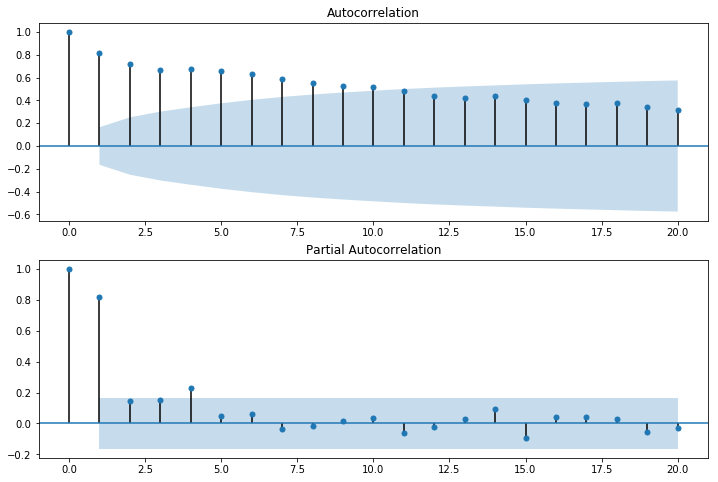

In [104]:
#3. Plot the autocorrelations and partial autocorrelations

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(globtemp, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(globtemp, lags=20, ax=ax2)

/Users/Pan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


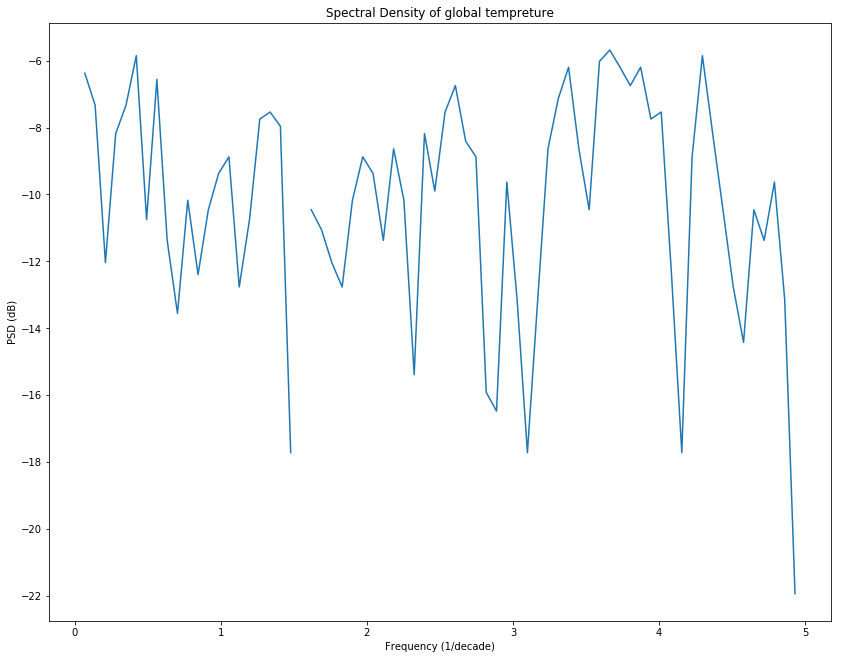

In [105]:
#4. Plot the periodogram and the frequencies with the original series
# Get the FFT for the passenger series

my_fft = sp.fftpack.fft(globtemp)
my_psd = np.abs(my_fft)**2

# Filter by positive frequencies

my_fftfreq = sp.fftpack.fftfreq(len(my_psd), 1/10)
i = my_fftfreq > 0 

# Plot the Periodogram and find the frequencies

plt.figure(figsize = (14,11))
plt.plot(my_fftfreq[i], 10*np.log10(my_psd[i]))
#plt.xlim(0,5)
plt.xlabel('Frequency (1/decade)')
plt.ylabel('PSD (dB)')
plt.title('Spectral Density of global tempreture')

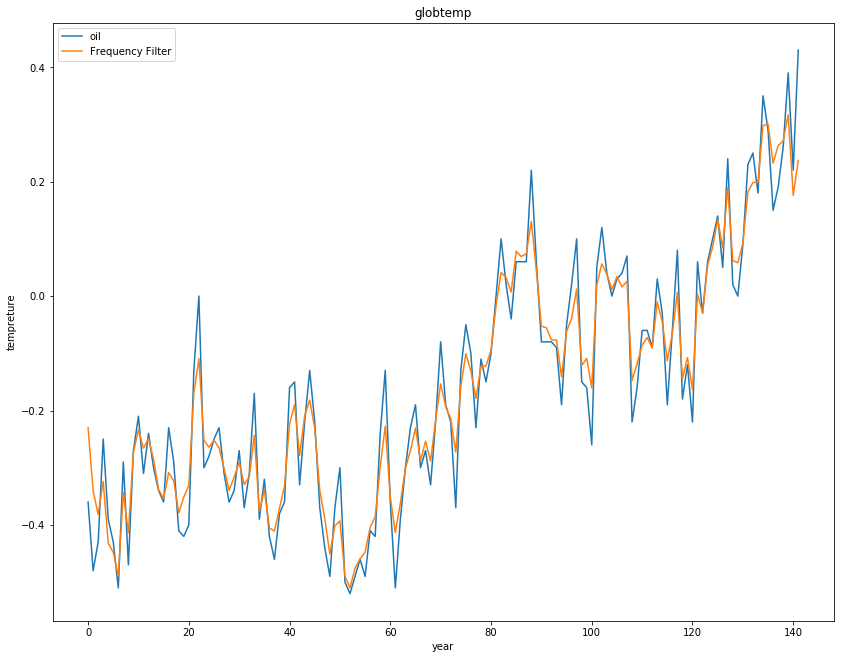

In [106]:
# Remove all frequencies that are harmonics
# Invert the FFT to get a model of the time series
# Use only the real part

my_fft_bis = sp.fftpack.fft(globtemp['mycol']) # get a copy
my_fft_bis[np.abs(my_fftfreq > 1.1)] = 0 # remove harmonics
my_freqfit = np.real(sp.fftpack.ifft(my_fft_bis)) #invert fft
my_freqfit = pd.Series(my_freqfit,index = np.asarray(globtemp.index))

# 
# Then plot on the original series
# with the frequency model

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(globtemp,label = 'oil')
ts.plot(my_freqfit,label = 'Frequency Filter')

ts.legend(loc = 'best')
ts.set_title("globtemp")
plt.xlabel('year')
plt.ylabel('tempreture')

In [ ]:
#5. Based on these filters and visualizations, comment on the characteristics (elements) of the time series

#filter with 10 periods (1 period) seem to have a good prediction

# flu #
Monthly pneumonia and influenza deaths per 10,000 people in the United States for 11 years, 1968 to 1978.

In [109]:
times=pd.date_range(start=pd.datetime(1968, 1, 1), periods=132, freq='M')
flu.index=times
times

DatetimeIndex(['1968-01-31', '1968-02-29', '1968-03-31', '1968-04-30',
               '1968-05-31', '1968-06-30', '1968-07-31', '1968-08-31',
               '1968-09-30', '1968-10-31',
               ...
               '1978-03-31', '1978-04-30', '1978-05-31', '1978-06-30',
               '1978-07-31', '1978-08-31', '1978-09-30', '1978-10-31',
               '1978-11-30', '1978-12-31'],
              dtype='datetime64[ns]', length=132, freq='M')

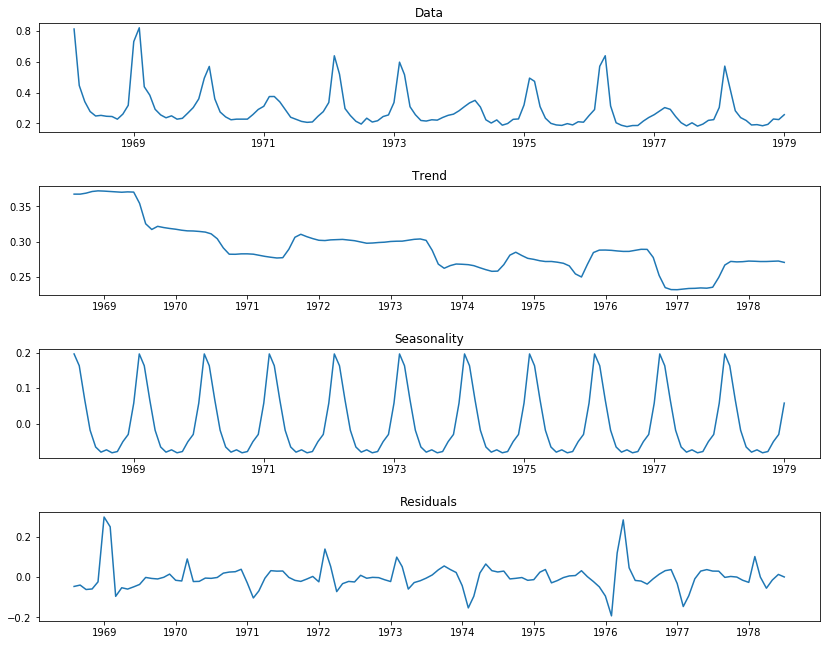

In [111]:
#1. Decompose to show the elements of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(flu, freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (14,11))
plt.subplots_adjust(hspace = .5)

ts = fig.add_subplot(4, 1, 1)
ts.set_title("Data")
ts.plot(flu)

ts_trend = fig.add_subplot(4,1,2)
ts_trend.plot(trend)
ts_trend.set_title('Trend')

ts_seasonal = fig.add_subplot(4,1,3)
ts_seasonal.plot(seasonal)
ts_seasonal.set_title('Seasonality')

ts_residual = fig.add_subplot(4,1,4)
ts_residual.plot(residual)
ts_residual.set_title('Residuals')

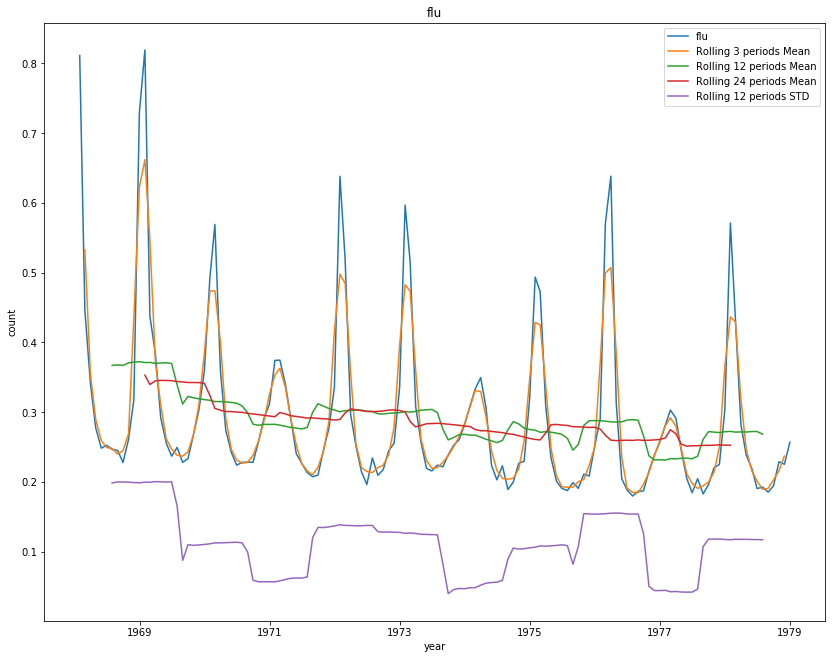

In [112]:
#2. Filter based on moving averages (at least 3) and differences (at least the first)

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(flu,label = 'flu')

ts.plot(flu.rolling(window =  3, center = True).mean(),label = 'Rolling 3 periods Mean')
ts.plot(flu.rolling(window =  12, center = True).mean(),label = 'Rolling 12 periods Mean')
ts.plot(flu.rolling(window =  24, center = True).mean(),label = 'Rolling 24 periods Mean')
ts.plot(flu.rolling(window =  12, center = True).std(),label = 'Rolling 12 periods STD')

ts.legend(loc = 'best')
ts.set_title("flu")
ts.set_ylabel("count")
ts.set_xlabel("year")


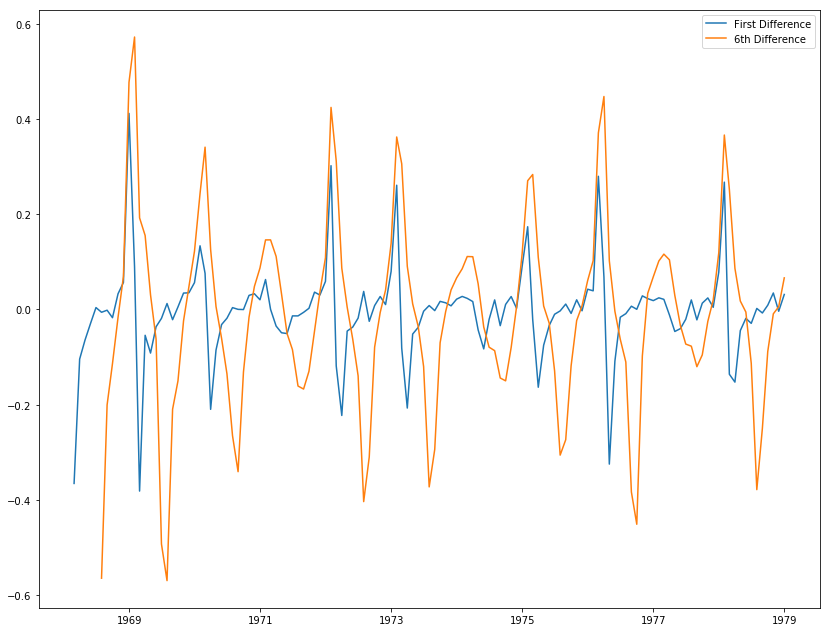

In [113]:
# Filters - Differences
#HighPass Filter

fig = plt.figure(figsize = (14,11))
ts_diff = fig.add_subplot(1,1,1)

ts_diff.plot(flu.diff(1),label = 'First Difference')
#ts_diff.plot(oil.diff(3),label = '3rd Difference')
ts_diff.plot(flu.diff(6),label = '6th Difference')
#ts_diff.plot(oil.diff(12),label = '12th Difference')

ts_diff.legend(loc = 'best')

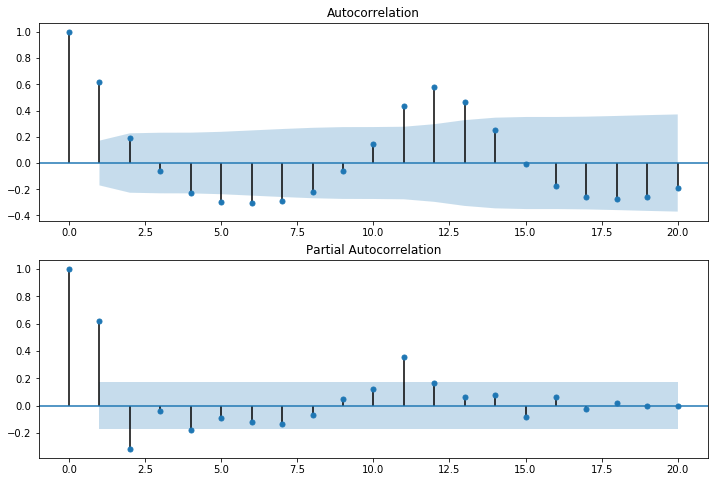

In [114]:
#3. Plot the autocorrelations and partial autocorrelations

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(flu, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(flu, lags=20, ax=ax2)

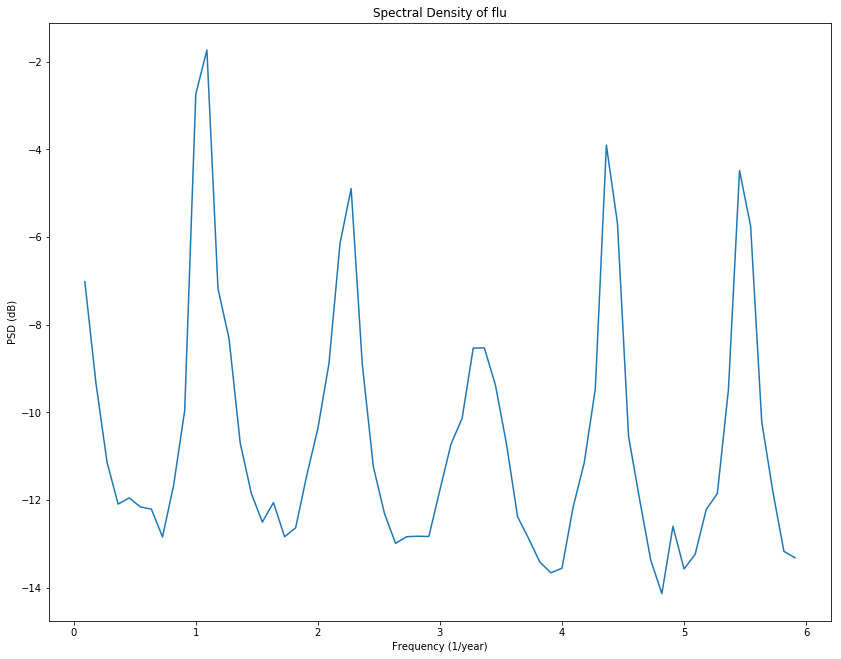

In [115]:
#4. Plot the periodogram and the frequencies with the original series
# Get the FFT for the passenger series

my_fft = sp.fftpack.fft(flu)
my_psd = np.abs(my_fft)**2

# Filter by positive frequencies

my_fftfreq = sp.fftpack.fftfreq(len(my_psd), 1/12)
i = my_fftfreq > 0 

# Plot the Periodogram and find the frequencies

plt.figure(figsize = (14,11))
plt.plot(my_fftfreq[i], 10*np.log10(my_psd[i]))
#plt.xlim(0,5)
plt.xlabel('Frequency (1/year)')
plt.ylabel('PSD (dB)')
plt.title('Spectral Density of flu')

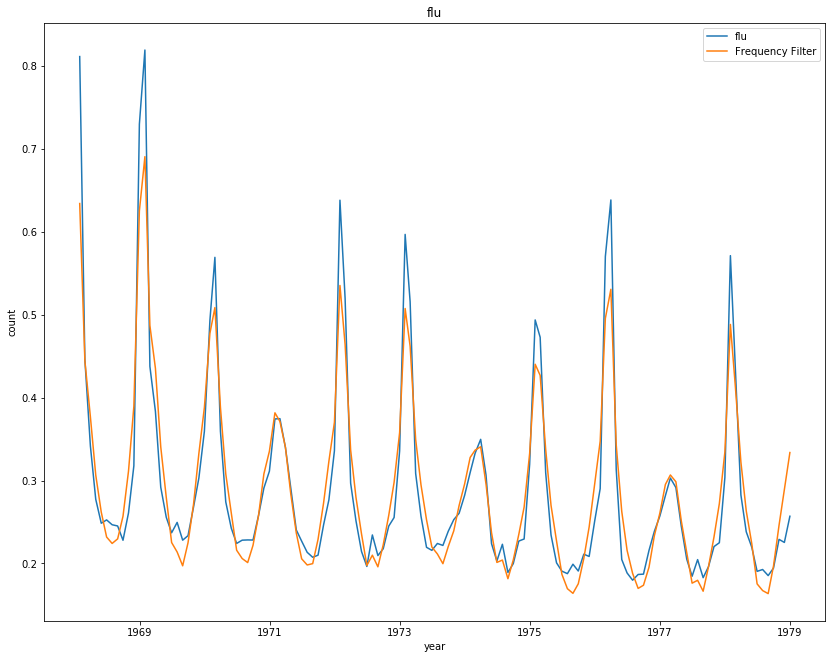

In [116]:
# Remove all frequencies that are harmonics
# Invert the FFT to get a model of the time series
# Use only the real part

my_fft_bis = sp.fftpack.fft(flu['mycol']) # get a copy
my_fft_bis[np.abs(my_fftfreq > 1.1)] = 0 # remove harmonics
my_freqfit = np.real(sp.fftpack.ifft(my_fft_bis)) #invert fft
my_freqfit = pd.Series(my_freqfit,index = np.asarray(flu.index))

# 
# Then plot on the original series
# with the frequency model

fig = plt.figure(figsize = (14,11))
ts = fig.add_subplot(1, 1, 1)
ts.plot(flu,label = 'flu')
ts.plot(my_freqfit,label = 'Frequency Filter')

ts.legend(loc = 'best')
ts.set_title("flu")
plt.xlabel('year')
plt.ylabel('count')

In [117]:
#5. Based on these filters and visualizations, comment on the characteristics (elements) of the time series

#filter with 12 periods (1 year) seem to have a good prediction